In [1]:
import os
import timeit

from HMM_george import unsupervised_HMM
from HMM_helper_processed import (
    text_to_wordcloud,
    states_to_wordclouds,
    parse_observations,
    sample_sentence,
    visualize_sparsities,
    animate_emission
)

In [2]:
shakespeare = open(os.path.join(os.getcwd(), 'data/shakespeare.txt')).read()
# poem3 = open(os.path.join(os.getcwd(), 'data/poem3.txt')).read()


obs, obs_map = parse_observations(shakespeare)

In [3]:
# print(len(obs))
# print(obs[0])

# print(len(obs_map))
# print(obs_map)

In [4]:
num_hmm_hidden_states = [2**0, 2**1, 2**2, 2**3, 2**4, 2**5]
num_iters = 10

In [5]:
arrangement_of_words = [9, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 9, 9]

def train(observations, observation_map, num_hidden_states, num_iterations, arrangement_of_words, num_words = 115):
    start_time = timeit.default_timer()
    hmm = unsupervised_HMM(observations, num_hidden_states, num_iterations)
    stop_time = timeit.default_timer()
    print('Elpased time: ', stop_time - start_time)
    print('Sample Poem:\n====================')
    sentence = sample_sentence(hmm, observation_map, n_words=num_words)
    sentence_split_by_spaces = sentence.split()
    
    count = 0
    total_num_words_printed = 0
    for num_words in arrangement_of_words:
        if(count == 0):
            sent = " ".join(sentence_split_by_spaces[0:num_words])
            
        elif count > 0:
            sent = " ".join(sentence_split_by_spaces[total_num_words_printed: total_num_words_printed + num_words])
            
        print(sent)
        total_num_words_printed += num_words
        count += 1
        
    return hmm

In [6]:
# hyphens should be removed as words
# punctuation can't directly follow other punctuation
# If there is a single i, it needs to be capitalized
# remake carrots into apostrophes

In [7]:
# num_hmm_hidden_states = [2**2, 2**3, 2**4, 2**5]
# num_iters = 1000

# for hidden_state in num_hmm_hidden_states:
#     print('On HMM number: ', hidden_state)
#     train(obs, obs_map, hidden_state, num_iters, arrangement_of_words, 115)
#     print('')


print('Training HMM 8:')
hmm_sabera_8 = train(obs, obs_map, 8, 10, arrangement_of_words, 115)


Training HMM 8:
On iteration number:  0
Elpased time:  10.294817237
Sample Poem:
And their never with from than counting when on
and all be as your and is in
or buy a which of curious i be
needs of else never too on fever gilding
still with vices sweet can or ? should
of than which look trespass like not and
^this and which by how and not who
doth and ah till to slight own if
excuse betraying husband^s with shouldst and to a
looking doth it which self to face very
and where ^tis summer loves and a laid
and unlettered seem to of can and seat
doth she sake of sorrow be a drained which
with ? when thy thou should which holds gilding...


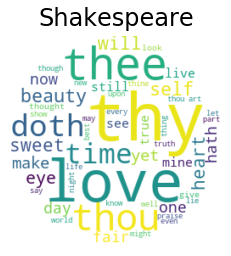

In [8]:
wordcloud = text_to_wordcloud(shakespeare, title='Shakespeare')

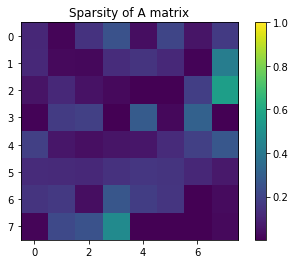

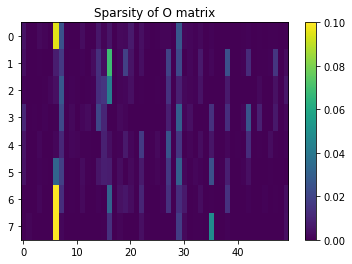

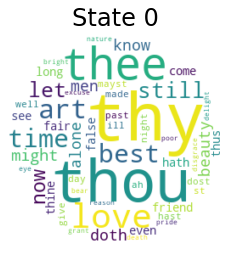

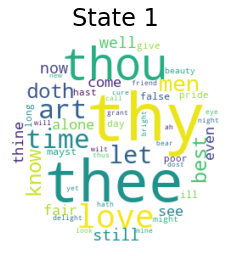

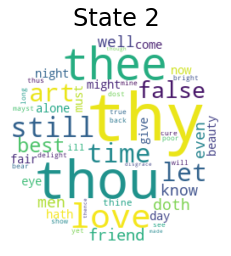

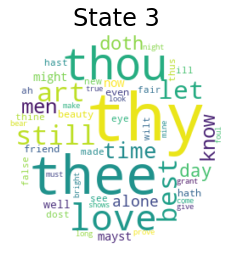

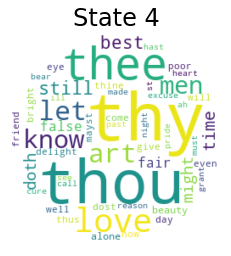

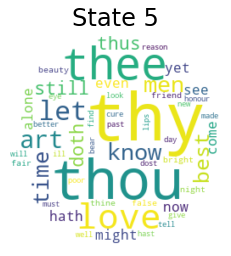

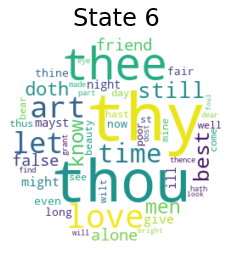

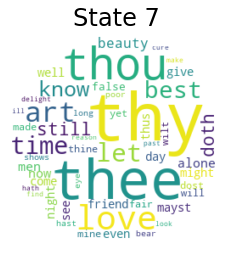

In [10]:
visualize_sparsities(hmm_sabera_8, O_max_cols=50)
print('')
wordclouds_8 = states_to_wordclouds(hmm_sabera_8, obs_map)